In [1]:
import sys
print(sys.version)

from locallib import eyeutil, analysis, crypto

3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]


# Josse Basic

In [19]:
# Setup Main Josse Cipher
main_a = "ABCDEFGHIJKLMNOPQRSTUVXYZ"
mainKey = "REPETITION"
cipher_main = crypto.JosseCipher(main_a)
cipher_main.set_key(mainKey)
cipher_main.log()
print("")

# Encrypt then decrypt a message
inMsgM = "HEREISAVERYLONGREPETITIONSOMEEXPRESSIONSREPEATEDSEVERALTIMESAGAIN"
msg_mv, msg_uv, msg_cv, msg_c = cipher_main.encrypt(inMsgM)
msg_mv, msg_m = cipher_main.decrypt(msg_c)
print(msg_uv)
print(inMsgM, msg_mv)
print(msg_c, msg_cv)
print(msg_m, msg_mv)

Alphabet (25):  ABCDEFGHIJKLMNOPQRSTUVXYZ
Key (S) Wrapped:  ['REPTION', 'ABCDFGH', 'JKLMQSU', 'VXYZ']
Key (S):  {17: 0, 0: 1, 9: 2, 21: 3, 4: 4, 1: 5, 10: 6, 22: 7, 15: 8, 2: 9, 11: 10, 23: 11, 19: 12, 3: 13, 12: 14, 24: 15, 8: 16, 5: 17, 16: 18, 14: 19, 6: 20, 18: 21, 13: 22, 7: 23, 20: 24}
Key (S) Inverse:  {0: 17, 1: 0, 2: 9, 3: 21, 4: 4, 5: 1, 6: 10, 7: 22, 8: 15, 9: 2, 10: 11, 11: 23, 12: 19, 13: 3, 14: 12, 15: 24, 16: 8, 17: 5, 18: 16, 19: 14, 20: 6, 21: 18, 22: 13, 23: 7, 24: 20}
RAJVEBKXPCLYTDMZIFQOGSNHU
BFJNERUYQCGKOXTISAVMZDHLP

[23, 4, 0, 4, 16, 21, 1, 3, 4, 0, 11, 10, 19, 22, 20, 0, 4, 8, 4, 12, 16, 12, 16, 19, 22, 21, 19, 14, 4, 4, 7, 8, 0, 4, 21, 21, 16, 19, 22, 21, 0, 4, 8, 4, 1, 12, 4, 13, 21, 4, 3, 4, 0, 1, 10, 12, 16, 14, 4, 21, 1, 20, 1, 16, 22]
HEREISAVERYLONGREPETITIONSOMEEXPRESSIONSREPEATEDSEVERALTIMESAGAIN [7, 4, 17, 4, 8, 18, 0, 21, 4, 17, 23, 11, 14, 13, 6, 17, 4, 15, 4, 19, 8, 19, 8, 14, 13, 18, 14, 12, 4, 4, 22, 15, 17, 4, 18, 18, 8, 14, 13, 18, 17, 4, 15, 4,

# Josse Isomorph

In [3]:
# Setup values
full_c = "RVECAHRECLNPVANHVTFBNLJNGFTJXTGEBLXESIMYPCMHVBQHTCMQHUATRFXTCYXCAUETSNJUSDPKVRAKZGNLZEAKLZIQEFCUEAJXEEZVGQMKEKLZIVMCXVECQHYVIPVAYP"
main_a = "ABCDEFGHIJKLMNOPQRSTUVXYZ"

# Get isomorphs
isos = analysis.calc_isomorphs([ full_c, full_c ], allow_equal=False)
print("Found " + str(len(isos)))
for iso in isos:
    print(f"{iso[2][0][0]} -> {iso[2][0][1]} and {iso[2][1][0]} -> {iso[2][1][1]}")

# Check isomorphs
iso11 = full_c[isos[0][2][0][0]:isos[0][2][0][1]]
iso12 = full_c[isos[0][2][1][0]:isos[0][2][1][1]]
iso21 = full_c[isos[2][2][0][0]:isos[2][2][0][1]]
iso22 = full_c[isos[2][2][1][0]:isos[2][2][1][1]]
# iso11 = "XTGEBLXESIMYPCMHVBQHTCMQHUATRFXTC"
# iso12 = "UETSNJUSDPKVRAKZGNLZEAKLZIQEFCUEA"
# iso21 = "HRECLNPVANHVTFBNLJNG"
# iso22 = "EKLZIVMCXVECQHYVIPVA"

# Print main isomorphs
print("\nKey Isomorphs:")
print(iso11)
print(iso12)
print(iso21)
print(iso22)
print(analysis.calc_if_isomorphic([ iso11, iso12 ]))
print(analysis.calc_if_isomorphic([ iso21, iso22 ]))

# Print out chains from pair 1
print("")
chains12 = analysis.calc_chains(iso11, iso12)
print(" ".join([ a.rjust(3) for a in iso11 ]))
print(" ".join([ a.rjust(3) for a in iso12 ]))
print("\nChains: " + str(chains12))
print("\n")

# Print out chains from pair 2
chains34 = analysis.calc_chains(iso21, iso22)
print(" ".join([ a.rjust(3) for a in iso21 ]))
print(" ".join([ a.rjust(3) for a in iso22 ]))
print("\nChains: " + str(chains34))

Found 7
28 -> 61 and 65 -> 98
65 -> 98 and 28 -> 61
5 -> 25 and 108 -> 128
108 -> 128 and 5 -> 25
35 -> 46 and 89 -> 100
27 -> 35 and 116 -> 124
54 -> 62 and 79 -> 87

Key Isomorphs:
XTGEBLXESIMYPCMHVBQHTCMQHUATRFXTC
UETSNJUSDPKVRAKZGNLZEAKLZIQEFCUEA
HRECLNPVANHVTFBNLJNG
EKLZIVMCXVECQHYVIPVA
(True, [1, 2, nan, 3, 4, nan, 1, 3, nan, nan, 5, nan, nan, 6, 5, 7, nan, 4, 8, 7, 2, 6, 5, 8, 7, nan, nan, 2, nan, nan, 1, 2, 6], 8)
(True, [1, nan, nan, nan, 2, 3, nan, 4, nan, 3, 1, 4, nan, nan, nan, 3, 2, nan, 3, nan], 4)

  X   T   G   E   B   L   X   E   S   I   M   Y   P   C   M   H   V   B   Q   H   T   C   M   Q   H   U   A   T   R   F   X   T   C
  U   E   T   S   N   J   U   S   D   P   K   V   R   A   K   Z   G   N   L   Z   E   A   K   L   Z   I   Q   E   F   C   U   E   A

Chains: ['YVGTESD', 'XUIPRFCAQLJ', 'BN', 'HZ', 'MK']


  H   R   E   C   L   N   P   V   A   N   H   V   T   F   B   N   L   J   N   G
  E   K   L   Z   I   V   M   C   X   V   E   C   Q   H   Y   V   I   P   V   A



In [9]:
# EXTRA INFO
# -----------
# 
# S_I is basically a mapping of funky 0 - 25 to the nice alphabet
# In this implementation S_I variable is used to convert UV to MV when deciphering
# 
# Each adjacent character in this final chain is D values apart in CV world
# This is what multiples of a number D act like, and is hence as if you multiplied
#   some alphabet (in this case S_I) by D
# In fancy terms this means that the chain is a decimation of S_I with factor D


# CODE FOR GETTING ALL POSSIBLE S_I'S
# ------------------------------------

# Setup values
final_chain = "BNMKHZXUIPRFCAQLJOYVGTESD"
cipher_main = crypto.JosseCipher(main_a)

# Try each 1 <= d <= len(A) multiplier for decimation
key_pairs = { }
for d in range(2, len(cipher_main.a)):
  if d % 5 == 0:
    continue

  # Try each rotation of the chain
  for offset in range(len(final_chain)):
    r_bC = (final_chain[-offset:] if offset > 0 else "") + final_chain[:len(final_chain) - offset]
    r_bCV = [ cipher_main.map_a_to_v[c] for c in r_bC ]

    # Reverse decimation to get S_I and S
    newS_I = { }
    for i, cv in enumerate(r_bCV):
      newS_I[cipher_main.modA(d * i)] = cv
    newS = { }
    for i in range(len(cipher_main.a)):
      newS[newS_I[i]] = i 

    # Print out some decrypted text for inspection
    cipher_main.S = newS
    cipher_main.S_I = newS_I
    decMV, decM = cipher_main.decrypt(full_c)
    keyKey = str(d) + "," + str(offset)
    key_pairs[keyKey] = ( newS, newS_I )
    print(keyKey + ": " + decM)

2,0: QOLMAKYDMLSGEXBLMQMNANAEXKEUMMFQLMKKAEXKKLMQMYNMHKMDMLYGNAUMKYBYAXMFQLMKKAEXKKLMQMYNMHKMDMLYGNAUMKLMKCGNAXBAXYDMLSGEXBLMQMNANAEXOK
2,1: CYQNCMOSNQEVTZDQNANBCBCTZMTXNNRAQNMMCTZMMQNANOBNKMNSNQOVBCXNMODOCZNRAQNMMCTZMMQNANOBNKMNSNQOVBCXNMQNMFVBCZDCZOSNQEVTZDQNANBCBCTZJM
2,2: RVABFNJEBATYGHSABCBDFDFGHNGZBBPCABNNFGHNNABCBJDBMNBEBAJYDFZBNJSJFHBPCABNNFGHNNABCBJDBMNBEBAJYDFZBNABNRYDFHSFHJEBATYGHSABCBDFDFGHLN
2,3: IGCDRBLTDCGOVKECDFDSRSRVKBVHDDIFCDBBRVKBBCDFDLSDNBDTDCLOSRHDBLELRKDIFCDBBRVKBBCDFDLSDNBDTDCLOSRHDBCDBPOSRKERKLTDCGOVKECDFDSRSRVKQB
2,4: XTFSPDQGSFVJYMTFSRSEPEPYMDYKSSURFSDDPYMDDFSRSQESBDSGSFQJEPKSDQTQPMSURFSDDPYMDDFSRSQESBDSGSFQJEPKSDFSDIJEPMTPMQGSFVJYMTFSRSEPEPYMAD
2,5: HEREISAVERYLONGREPETITIONSOMEEXPRESSIONSSREPEATEDSEVERALTIMESAGAINEXPRESSIONSSREPEATEDSEVERALTIMESRESULTINGINAVERYLONGREPETITIONCS
2,6: MSPTUECYTPOQJBVPTITGUGUJBEJNTTZIPTEEUJBEEPTITCGTSETYTPCQGUNTECVCUBTZIPTEEUJBEEPTITCGTSETYTPCQGUNTEPTEXQGUBVUBCYTPOQJBVPTITGUGUJBFE
2,7: BDIGXTFOGIJALDYIGUGVXVXLDTLBGGHUIGTTXLDTTIG

In [11]:
# Pick final decided key
key_keys = [
  "2,5",
  "3,1",
  "6,22",
  "8,21",
  "9,4",
  "11,2",
  "12,20",
  "13,16",
  "14,9",
  "16,7",
  "17,15",
  "18,11",
  "19,14",
  "21,12",
  "22,10",
  "23,6",
  "24,19"
]
( finalS, finalS_I ) = key_pairs[key_keys[10]]
cipher_main.S = finalS
cipher_main.S_I = finalS_I
cipher_main.has_key = True

# Log, then decrypt text and print
print("")
cipher_main.log()
decMV, decM = cipher_main.decrypt(full_c)
print("")
print(keyKey + ": " + decM)


Alphabet (25):  ABCDEFGHIJKLMNOPQRSTUVXYZ
Key (S):  {17: 0, 0: 1, 9: 2, 21: 3, 4: 4, 1: 5, 10: 6, 22: 7, 15: 8, 2: 9, 11: 10, 23: 11, 19: 12, 3: 13, 12: 14, 24: 15, 8: 16, 5: 17, 16: 18, 14: 19, 6: 20, 18: 21, 13: 22, 7: 23, 20: 24}
Key (S) Inverse:  {0: 17, 17: 5, 9: 2, 1: 0, 18: 16, 10: 11, 2: 9, 19: 14, 11: 23, 3: 21, 20: 6, 12: 19, 4: 4, 21: 18, 13: 3, 5: 1, 22: 13, 14: 12, 6: 10, 23: 7, 15: 24, 7: 22, 24: 20, 16: 8, 8: 15}
RAJVEBKXPCLYTDMZIFQOGSNHU
BFJNERUYQCGKOXTISAVMZDHLP

24,24: HEREISAVERYLONGREPETITIONSOMEEXPRESSIONSSREPEATEDSEVERALTIMESAGAINEXPRESSIONSSREPEATEDSEVERALTIMESRESULTINGINAVERYLONGREPETITIONCS


# Eyes Isomorphs

In [12]:
import string
a = string.ascii_lowercase + string.ascii_uppercase + "!\"$%&/()=<>+*#',;.:-_ " + "012345679"
print(len(a))

83


In [15]:
# Setup messages
# checkMessages = [ [ e % 26 for e in msg ] for msg in eyeMessagesTri ]
# triA = string.ascii_lowercase
checkMessages = eyeutil.msgs_eye_tri
triA = string.ascii_lowercase + string.ascii_uppercase + "!\"$%&/()=<>+*#',;.:-_ " + "012345679"

# Setup variables
cipherTri = crypto.JosseCipher(triA)
ml = min([ len(msg) for msg in checkMessages ])
checkMessagesTrim = [ msg[:ml] for msg in checkMessages ]
texts = [ "".join([ cipherTri.map_v_to_a[mv] for mv in msg ]) for msg in checkMessagesTrim ]


In [16]:
# Get isomorphs in text 0 and 2
for i in range(len(texts)):
  if i > 0: continue
  for j in range(len(texts)):
    if i == j: continue
    print("Comparing ", i, " against ", j)
    isos = analysis.calc_isomorphs([ texts[i], texts[j] ])

    print("Found " + str(len(isos)))
    for iso in isos:
      iso0 = texts[i][iso[2][0][0]:iso[2][0][1]]
      iso1 = texts[j][iso[2][1][0]:iso[2][1][1]]
      _, letters, different = analysis.calc_if_isomorphic([ iso0, iso1 ])
      print(" ".join(list(iso0)))
      print(" ".join(list(iso1)))
      print(" ".join([ str(l) for l in letters ]))
      print("")

Comparing  0  against  1
Found 6
Y ' f W > n 1 D y < Q : ' > G o 7 i p 4 c D n X b
6 ' f W > n 1 D y < Q : ' > G o 7 i p 4 c D n X b
nan 1 nan nan 2 3 nan 4 nan nan nan nan 1 2 nan nan nan nan nan nan nan 4 3 nan nan

+ 7 v t a O Z # A o v : V S W Q t W n V t X
! 7 v t a z A $ u o v : V S W Q t W n V t X
nan nan 1 2 nan nan nan nan nan nan 1 nan 3 nan 4 nan 2 4 nan 3 2 nan

H X P = v A E f z u - l 0 & e 0 t - e Z
b E   x , g H z * 7 ; U r K n r v ; n j
nan nan nan nan nan nan nan nan nan nan 1 nan 2 nan 3 2 nan 1 3 nan

D y < Q : ' > G o 7 i p 4 c D n X b
D y < Q : ' > G o 7 i p 4 c D n X b
1 nan nan nan nan nan nan nan nan nan nan nan nan nan 1 nan nan nan

W Q t W n V t X _ F f y d R ) ,
W Q t W n V t X S A ) 3 * R 5 C
1 nan 2 1 nan nan 2 nan nan nan nan nan nan nan nan nan

+ 7 v t a O Z # A o v : V S
! 7 v t a z A $ u o v : V S
nan nan 1 nan nan nan nan nan nan nan 1 nan nan nan

Comparing  0  against  2


KeyboardInterrupt: 

In [17]:
# Pick pairs of isomorphs
isos = analysis.calc_isomorphs([ texts[0], texts[2] ])
iso11 = texts[0][isos[0][2][0][0]:isos[0][2][0][1]]
iso12 = texts[2][isos[0][2][1][0]:isos[0][2][1][1]]
iso21 = texts[0][isos[1][2][0][0]:isos[1][2][0][1]]
iso22 = texts[2][isos[1][2][1][0]:isos[1][2][1][1]]

# Get chains for each pair of isomorphs
chains12 = analysis.calc_chains(iso11, iso12)
print(" ".join([ a.rjust(3) for a in iso11 ]))
print(" ".join([ a.rjust(3) for a in iso12 ]))
print("\nChains: " + str(chains12))
print("\n")
chains34 = analysis.calc_chains(iso21, iso22)
print(" ".join([ a.rjust(3) for a in iso21 ]))
print(" ".join([ a.rjust(3) for a in iso22 ]))
print("\nChains: " + str(chains34))

  Y   '   f   W   >   n   1   D   y   <   Q   :   '   >   G   o   7   i   p   4   c   D   n   X   b   6   9   O   +
  K   '   f   W   >   n   1   D   y   <   Q   :   '   >   G   o   7   i   p   4   c   D   n   X   b   .   2   !   j

Chains: ['bb', 'QQ', 'GG', "''", 'pp', 'WW', 'DD', '<<', '+j', '77', '6.', 'oo', 'nn', 'cc', 'yy', 'O!', 'XX', 'YK', 'ii', '92', '>>', '44', 'ff', '11', '::']


  y   d   R   )   ,   H   X   P   =   v   A   E   f   z   u   -   l   0   &   e   0   t   -   e   Z
  <   I   $   :   v   p   e   '   3   Q   L   E   w   a   l   P   _   /   u   x   /   #   P   x   s

Chains: ['Zs', "-P'", ',vQ', '=3', 'Xex', 'za', 'R$', 'fw', '0/', 'dI', 'Hp', '&ul_', 'AL', 'y<', 't#', '):', 'EE']


In [18]:
# Try decrypt some trigram stuff
triKey = "bdmagick"
cipherTri.set_key(triKey)
print("Alphabet (" + str(len(triA)) + "): " + triA)
print(" ")
for msg_cv in checkMessages:
  print("".join([ cipherTri.map_v_to_a[v] for v in msg_cv ]))
print(" ")
for msg_cv in checkMessages:
  msg_mv, msg_m = cipherTri.decrypt_cv(msg_cv)
  print(msg_m)


Alphabet (83): abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"$%&/()=<>+*#',;.:-_ 012345679
 
Y'fW>n1Dy<Q:'>Go7ip4cDnXb69O+7vtaOZ#Aov:VSWQtWnVtX_FfydR),HXP=vAEfzu-l0&e0t-eZPR6_$+57pqSFEmH/Cn*RW
6'fW>n1Dy<Q:'>Go7ip4cDnXbDlE!7vtazA$uov:VSWQtWnVtXSA)3*R5C_*bE x,gHz*7;UrKnrv;njU,/I>9pk >cl#_LSkR;>jIs
K'fW>n1Dy<Q:'>Go7ip4cDnXb.2!jW'6w*/OX4dq&tVO6gn*DX*+gXFnqkTyA3k=7<I$:vpe'3QLEwalP_/ux/#Pxs_QfdA4if$T3z*<qS$Zu+zlAT"=MI
2'fX1$.UGbQ=AWY6Gy%<VmvmX$IzKp&%uji>n9jSD="9Q6fR-d63V4Iz>skX>*!7l'>nVr!:AxGF*xJGYgbziLVRA2#;6rhT+o"+=q
+'fX1$c=DO4V=1,-=c#hVoT0)P6n=n7wJYONc)WF2c61b&,lviO#T1%N=Qndw/cg(j:b(&+;z5hut*c' E-qmE#Lunw+sU*)P79w4KVregrfK5+b*.pRe(&Fo*(sS4.baUu- zJiy
I'fX1$x0lnCAtW,/L=IC0krGlstRt7Qe>jUXGZ2(eRVr,5vGSqELACP;/IZk.:igURsNVRpnHEJ>LaLfM%LnOzjvl*f5Q;l-lWd,<OwoJY<Nlc'XZ"r K10$yE$:
B'fX1$c=DOc%jp)s;dKfV3SMbsC2eI=+(6r$51W$%t>*oVZ:1flVT(;.5zMT V;YIT4A5/e&w=s1R=),+QXHO#53hdA>F4A/.OexAn,QM_lN#=zg6';3)4t
3'fX1$c=DOc%jp)s;dKfV=v6b_%q9J/tb'sBNr07No4az#R'*M7xyY/E-1A;$/&Y- oviGA+fLtR'V"I'x F$M3,l+

**Texts 0 with 2, isomorphs 0 with 1**

*I think this was wrong but leaving it just incase.*

```
  p   h   x   p   i   v   a   e   f   z   u   t   l
  i   d   j   i   c   s   v   p   e   o   z   q   l

Chains: ['fepic', 'avs', 'uzo', 'll', 'hd', 'xj', 'tq']


  y   j   q   s   o   k   g   o   d   i   p   a   c
  y   a   z   k   i   d   j   i   c   s   v   p   e

Chains: ['qz', 'oiskdce', 'gjapv', 'yy']
```

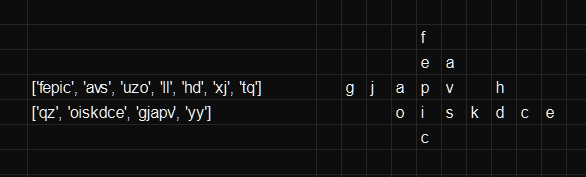